In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist


import sys
sys.path.append("../..")
from functools import partial

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

In [2]:
dumperInput = DumperInputManager(["/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/"], 
                                limitFileCount=None, restrictToAvailableDumperTypes=[DumperType.TICL, DumperType.TICLsupercls])

In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_207.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_207.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_207.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_203.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_203.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_203.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_202.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_202.root, DumperType.Supe

In [4]:
res = runComputations([CPToSuperclusterProperties, CPtoTrackster_properties], dumperInput, max_workers=10)
CPtoSC_df = res[0]
CPtoTs_df = res[1]

In [5]:
CPtoSC_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             1                          0       136.845169   
              0                          1       220.100174   
1             0                        640        69.472084   
              1                       2180        87.641090   
2             0                        718       292.333466   
...                                    ...              ...   
997           1                       1693        96.511948   
998           1                          2       276.707581   
              0                          3       291.213531   
999           1                          1       240.609238   
              0                          8       236.795578   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             1                        136.845169             145.826294   
              0                        220.100174             232.166504   
1             0                         69.472084              74.440201   
              1                         87.641090              92.927574   
2             0                        292.333466             309.982697   
...                                           ...                    ...   
997           1                         96.511948             104.034645   
998           1                        276.449371             293.732422   
              0                        290.940674             307.935364   
999           1                        240.609238             255.700958   
              0                        236.795578             250.752243   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             1                  47.985485             1.701492   
              0                  78.807503            -1.701307   
1             0                  14.973318            -2.232732   
              1                  18.736288             2.233380   
2             0                  89.364548            -1.855489   
...                                    ...                  ...   
997           1                  34.717476             1.698367   
998           1                  57.665089             2.183934   
              0                  63.073814            -2.183439   
999           1                  42.162647             2.571164   
              0                  34.817001            -2.572410   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             1                             238.019699   
              0                             241.493134   
1             0                              69.472084   
              1                              87.641090   
2             0                             292.333466   
...                                                ...   
997           1                              96.511948   
998           1                             282.845428   
              0                             294.921021   
999           1                             249.663773   
              0                             237.659897   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             1                                238.019699   
              0                                241.493134   
1             0                                 69.472084   
              1                                 87.641090   
2             0                                292.333466   
...                                                   ...   
997           1                                 96.511948   
998           1                               

In [6]:
CPtoTs_df

ts_id     score     sharedE  raw_energy  \
eventInternal caloparticle_id                                            
0             0                  717  0.023257  218.929138  220.100174   
              1                 2211  0.301643  135.187576  136.845169   
1             0                  641  0.176679   58.109055   69.472084   
              1                 2197  0.019125   82.800835   87.641090   
2             0                  716  0.008510  276.915649  292.333466   
...                              ...       ...         ...         ...   
997           1                 1697  0.088977   95.387070   96.511948   
998           0                  614  0.003265  281.200684  291.213531   
              1                 2265  0.011668  267.985260  276.707581   
999           0                  634  0.011583  215.692245  236.795578   
              1                 2251  0.017469  211.329330  240.609238   

                               raw_em_energy  regressed_energy     raw_pt  \
eventInternal caloparticle_id                                               
0             0                   220.100174        232.166504  78.807503   
              1                   136.845169        145.826294  47.985485   
1             0                    69.472084         74.440201  14.973318   
              1                    87.641090         92.927574  18.736288   
2             0                   292.333466        309.982697  89.364548   
...                                      ...               ...        ...   
997           1                    96.511948        104.034645  34.717476   
998           0                   290.940674        307.935364  63.073814   
              1                   276.449371        293.732422  57.665089   
999           0                   236.795578        250.752243  34.817001   
              1                   240.609238        255.700958  42.162647   

                               raw_em_pt  barycenter_eta  regressed_energy_CP  \
eventInternal caloparticle_id                                                   
0             0                78.807503       -1.701307           259.758545   
              1                47.985485        1.701492           259.758545   
1             0                14.973318       -2.232732           102.410866   
              1                18.736288        2.233380           102.410866   
2             0                89.364548       -1.855489           308.972961   
...                                  ...             ...                  ...   
997           1                34.717476        1.698367           140.290359   
998           0                63.014713       -2.183439           312.740784   
              1                57.611279        2.183934           312.740784   
999           0                34.817001       -2.572410           245.199448   
              1                42.162647        2.571164           245.199448   

                               raw_energy_CP  barycenter_x  barycenter_y  \
eventInternal caloparticle_id                                              
0             0                   261.881348   -111.176674     59.381359   
              1                   256.915436    109.049545    -60.680351   
1             0                    96.953743     16.776537    -69.644279   
              1                   102.453888    -15.415292     70.674911   
2             0                   305.155457   -101.900055    -33.689304   
...                                      ...           ...           ...   
997           1                   142.575638   -113.064857    -53.546749   
998           0                   314.584290    -20.907063     73.433456   
              1                   319.028168     20.058252    -73.957230   
999           0                   248.894424    -45.094082     24.530098   
              1                   252.169220     44.856384    -25.349365   

                       

In [19]:
#store = pd.HDFStore("/workspaces/repo/scratch/analyzer-test/store.hdf", mode="r")
#store = pd.HDFStore("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/store-v1/store.hdf", mode="r")

#df = store["CPToSupercluster"]
#df

In [26]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))
histedges_equalN(CPtoTs_df.raw_pt, 8)

array([ 0.44310403, 11.58994007, 23.00519753, 34.58568954, 46.85866928,
       58.3225441 , 68.96975708, 80.80027771, 97.74741364])

In [18]:
h_scOverCP_energy = hist.Hist(eratio_axis(label="Supercluster energy / CaloParticle energy"))
h_scOverCP_energy.fill(CPtoSC_df.regressed_energy_supercls_sum/CPtoSC_df.regressed_energy_CP)

Hist(Regular(100, 0, 2, name='e_ratio', label='Supercluster energy / CaloParticle energy'), storage=Double()) # Sum: 1993.0

In [19]:
h_seedOverCP_energy = hist.Hist(eratio_axis(label="Seed trackster energy / CaloParticle energy"))
h_seedOverCP_energy.fill(CPtoTs_df.regressed_energy/CPtoTs_df.regressed_energy_CP)


Hist(Regular(100, 0, 2, name='e_ratio', label='Seed trackster energy / CaloParticle energy'), storage=Double()) # Sum: 2000.0

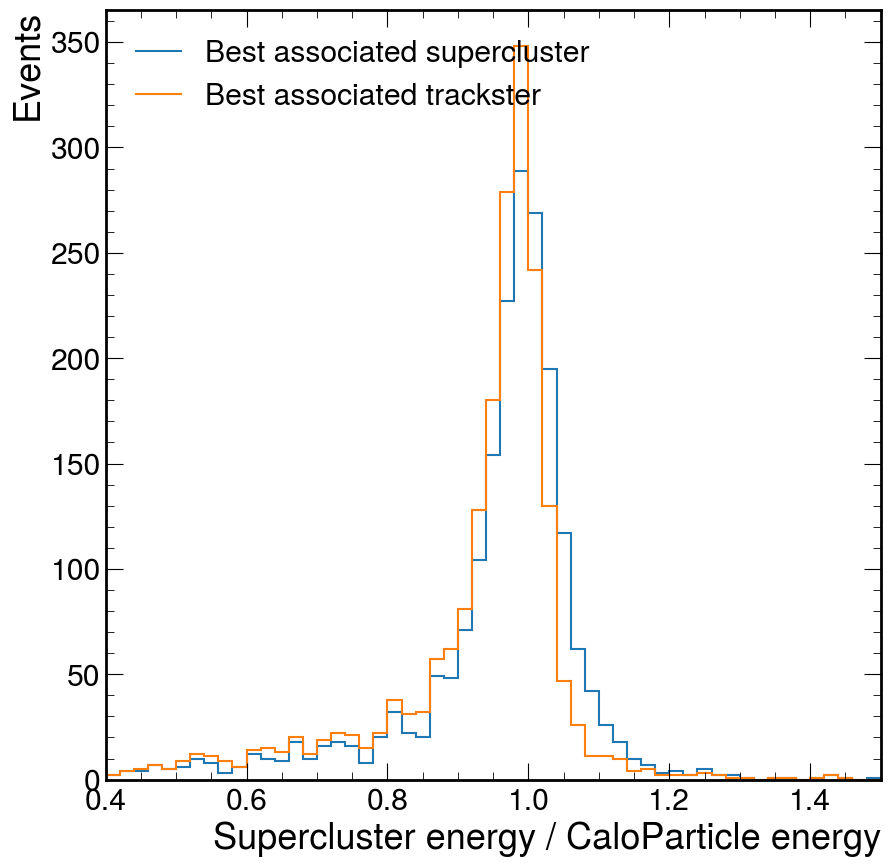

In [21]:

hep.histplot([h_scOverCP_energy, h_seedOverCP_energy], label=["Best associated supercluster", "Best associated trackster"], yerr=False, flow="none")
plt.xlim(0.4, 1.5)
plt.ylabel("Events")
plt.legend(loc="upper left")

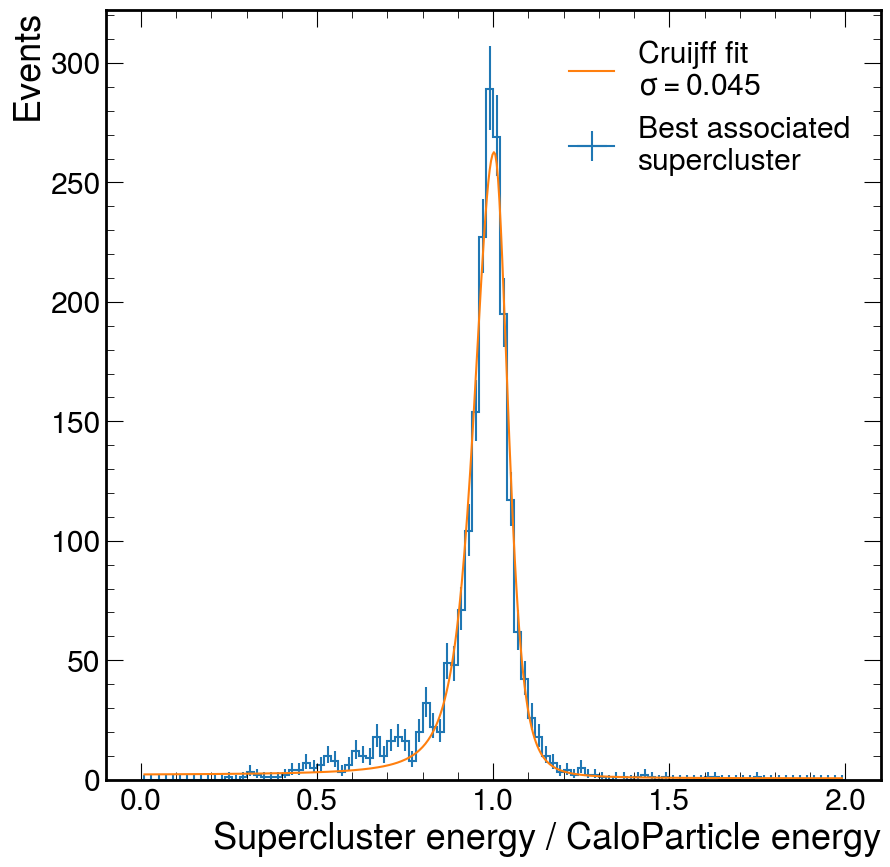

In [23]:
plt.figure()
hep.histplot([h_scOverCP_energy], label=["Best associated\nsupercluster", "Best associated trackster"])
param_optimised,__name__ = fitCruijff(h_scOverCP_energy)
x_plotFct = np.linspace(h_scOverCP_energy.axes[0].centers[0], h_scOverCP_energy.axes[0].centers[-1],500)
plt.plot(x_plotFct,cruijff(x_plotFct,*param_optimised), label=f"Cruijff fit\n$\sigma={(param_optimised[2]+param_optimised[3])/2:.3f}$")
plt.ylabel("Events")
plt.legend()

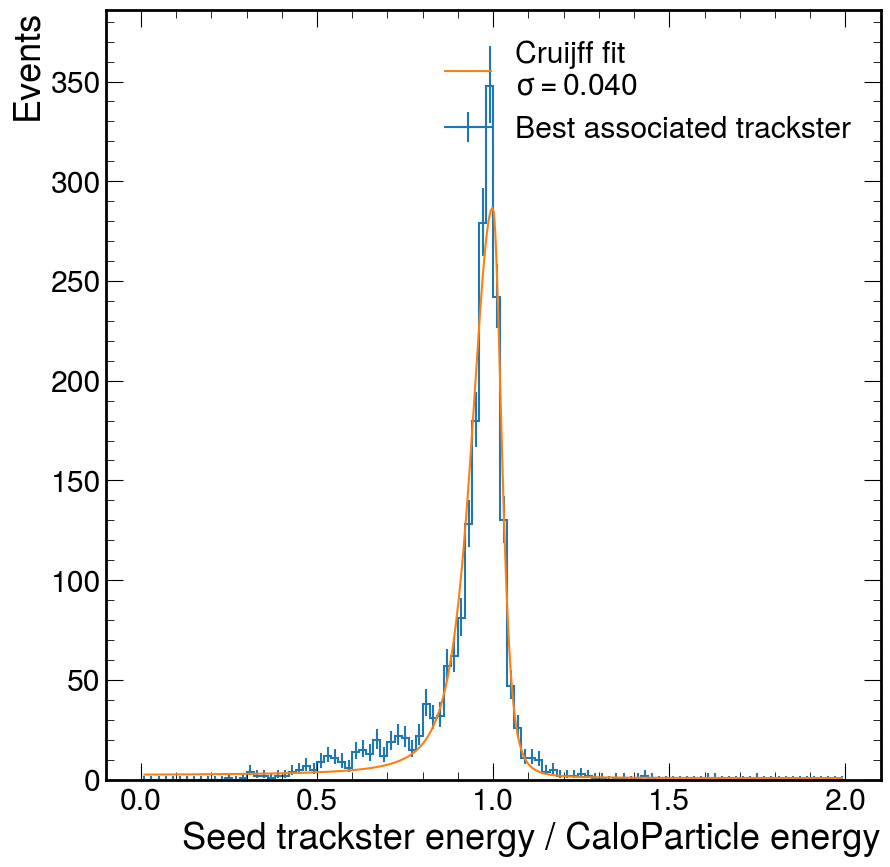

In [24]:
plt.figure()
hep.histplot([h_seedOverCP_energy], label=["Best associated trackster"])
param_optimised,__name__ = fitCruijff(h_seedOverCP_energy)
x_plotFct = np.linspace(h_seedOverCP_energy.axes[0].centers[0], h_seedOverCP_energy.axes[0].centers[-1],500)
plt.plot(x_plotFct,cruijff(x_plotFct,*param_optimised), label=f"Cruijff fit\n$\sigma={(param_optimised[2]+param_optimised[3])/2:.3f}$")
plt.ylabel("Events")
plt.legend()